**NOTE: All code snippets were executed on Heffa/hdsf and are hence commented out here. Time requirements were mentioned for the first assigment (since we were asked about it) but not for the other assignments (since we were not asked for those).**

## Auxilary Function

In [3]:
import pandas as pd
import matplotlib

def print_result(path, colnames, separator = " ", replace = True):
    
    df = pd.read_csv(path, sep = separator, header = None)
    df.columns = colnames

    if replace == True: 
        df.replace(',','',regex=True,inplace=True)
        df.replace('\(','',regex=True,inplace=True)
        df.replace('\)','',regex=True,inplace=True)

    print(df.head(10))
    print("...")
    print(df.tail(10))
    
    return(df)

***

# Assignment 1

The instructions are slightly unclear. They are understood in the following way:

1. temperature-readings.csv with spark (only temperature)
2. temperature-readings.csv with spark (temperature + station number)
3. temperatures-big.csv without spark (only temperature)
4. temperatures-big.csv with spark (only temperature)

## 1.1 temperature-readings.csv with spark (only temperature)

Time: Ca. 2 min

In [ ]:
"""
import pyspark

# Start SparkContext
sc = pyspark.SparkContext(appName="BDA")

# Import data as pyspark.rdd.RDD
directory = "/user/x_julki/data/temperature-readings.csv"
# directory = "./input/temperature-readings_100000.csv"
res = sc.textFile(directory)

# Split every line l by ;
res = res.map(lambda l: l.split(";"))

# Convert every line to tuples in the form (year, temperature) with type (int, (float))
res = res.map(lambda l: (int(l[1][0:4]), float(l[3])))

# Filter to get lines in the year range [1950, 2014]
res = res.filter(lambda l: l[0] >= 1950 and l[0] <= 2014)

# Get maximum temperatures by year
res_max = res.reduceByKey(max)

# Get minimum temperatures by year
res_min = res.reduceByKey(min)

res = res_max.zip(res_min).map(lambda l: (l[0][0], l[0][1], l[1][1]))
res = res.sortBy(lambda l: l[1], ascending=False, numPartitions=1)

res.saveAsTextFile("BDA1_results/Asg1_withSpark_temperature-readings_temperatureOnly.txt")
# res.saveAsTextFile("BDA1_results_100000/Asg1_withSpark_temperature-readings_temperatureOnly.txt")

# Stop SparkSession
sc.stop()
"""

In [5]:
# Show results
path = "output/BDA1_results_final/Asg1_withSpark_temperature-readings_temperatureOnly.txt/part-00000"
colnames = ["Year", "MaxTemp", "MinTemp"]
print_result(path, colnames)

   Year MaxTemp MinTemp
0  1975    36.1   -37.0
1  1992    35.4   -36.1
2  1994    34.7   -40.5
3  2010    34.4   -41.7
4  2014    34.4   -42.5
5  1989    33.9   -38.2
6  1982    33.8   -42.2
7  1968    33.7   -42.0
8  1966    33.5   -49.4
9  2002    33.3   -42.2
...
    Year MaxTemp MinTemp
55  1981    29.7   -44.0
56  1987    29.6   -47.3
57  1984    29.5   -39.2
58  1967    29.5   -45.4
59  1960    29.4   -40.0
60  1950    29.4   -42.0
61  1998    29.2   -42.7
62  1965    28.5   -44.0
63  1951    28.5   -42.0
64  1962    27.4   -42.0


## 1.2 temperature-readings.csv with spark (temperature + station number)

Time: Ca. 2 min

In [ ]:
"""
import pyspark

# Start SparkContext
sc = pyspark.SparkContext(appName="BDA")

# Import data as pyspark.rdd.RDD
directory = "/user/x_julki/data/temperature-readings.csv"
# directory = "./input/temperature-readings_100000.csv"
res = sc.textFile(directory)

# Split every line l by ;
res = res.map(lambda l: l.split(";"))

# Convert every line to tuples in the form (year, (temperature, stationnumber)) with type (int, (float, int))
res = res.map(lambda l: (int(l[1][0:4]), (float(l[3]), int(l[0]))))

# Filter to get lines in the year range [1950, 2014]
res = res.filter(lambda l: l[0] >= 1950 and l[0] <= 2014)

# Get maximum temperatures by year
res_max = res.reduceByKey(lambda x, y: (x if x[0] > y[0] else y))

# Get minimum temperatures by year
res_min = res.reduceByKey(lambda x, y: (x if x[0] < y[0] else y))

res = res_max.zip(res_min).map(lambda l: (l[0][0], l[0][1][0], l[1][1][0], l[1][1][1]))
res = res.sortBy(lambda l: l[1], ascending=False, numPartitions=1)

res.saveAsTextFile("BDA1_results/Asg1_withSpark_temperature-readings_temperaturePlusStationnumber.txt")
# res.saveAsTextFile("BDA1_results_100000/Asg1_withSpark_temperature-readings_temperaturePlusStationnumber.txt")

# Stop SparkSession
sc.stop()
"""

In [6]:
# Show results
path = "output/BDA1_results_final/Asg1_withSpark_temperature-readings_temperaturePlusStationnumber.txt/part-00000"
colnames = ["Year", "MaxTemp", "MinTemp", "Stationnumber"]
print_result(path, colnames)

   Year MaxTemp MinTemp Stationnumber
0  1975    36.1   -37.0        157860
1  1992    35.4   -36.1        179960
2  1994    34.7   -40.5        179960
3  2010    34.4   -41.7        191910
4  2014    34.4   -42.5        192840
5  1989    33.9   -38.2        166870
6  1982    33.8   -42.2        113410
7  1968    33.7   -42.0        179950
8  1966    33.5   -49.4        179950
9  2002    33.3   -42.2        169860
...
    Year MaxTemp MinTemp Stationnumber
55  1981    29.7   -44.0        166870
56  1987    29.6   -47.3        123480
57  1984    29.5   -39.2        123480
58  1967    29.5   -45.4        166870
59  1960    29.4   -40.0        167710
60  1950    29.4   -42.0        155910
61  1998    29.2   -42.7        169860
62  1965    28.5   -44.0        189780
63  1951    28.5   -42.0        155910
64  1962    27.4   -42.0        181900


## 1.3 temperatures-big.csv without spark (only temperature)

Time: Ca. 49 min (start at ca. 11:10:40 to 2019-04-10 11:59:40)

In [ ]:
"""
import csv 
import time
import datetime

# Start timer
start = time.time()
print(datetime.datetime.now())

# Import data
# directory = "./input/temperature-readings_100000.csv" # locally
directory = "../../hadoop_examples/shared_data/temperatures-big.csv"

# Identify the max and min temperatures by year
cnt = 0

with open(directory, "r") as input_file:
 
    input_file = csv.reader(input_file, delimiter = ';')
    input_dict = {}
    
    for row in input_file: 

        cnt += 1
        if cnt % 100000 == 0:
            print("{} | {}".format(datetime.datetime.now(), cnt))

        key = int(row[1][0:4])
        temp = float(row[3])

        if key >= 1950 and key <= 2014:
            if key not in input_dict.keys():
                input_dict.update({key: {'max': temp, 'min': temp}}) 
            else:
                if input_dict[key]['max'] < temp:
                    input_dict[key]['max'] = temp
                elif input_dict[key]['min'] > temp:
                    input_dict[key]['min'] = temp
                
                
    res = sorted([(k, v['max'], v['min']) for k, v in input_dict.items()], key = lambda x: x[1], reverse = True)
    
# Output min result as .csv file 
# with open("BDA1_results_100000/Asg1_withoutSpark_temperatures-big_temperatureOnly.txt", "w+") as output_file:
with open("BDA1_results/Asg1_withoutSpark_temperatures-big_temperatureOnly.txt", "w+") as output_file:

    output_file = csv.writer(output_file)    
    
    print("Writing to .txt now")
    for element in res:
        output_file.writerow(element)

# Stop timer
end = time.time()
print(datetime.datetime.now())
print(str(end - start) + " seconds")
"""

In [93]:
# Show results
path = "output/BDA1_results_final/Asg1_withoutSpark_temperatures-big_temperatureOnly.txt"
colnames = ["Year", "MaxTemp", "MinTemp"]
print_result(path, colnames, separator = ",", replace = False)

   Year  MaxTemp  MinTemp
0  1975     36.1    -37.0
1  1992     35.4    -36.1
2  1994     34.7    -40.5
3  2010     34.4    -41.7
4  2014     34.4    -42.5
5  1989     33.9    -38.2
6  1982     33.8    -42.2
7  1968     33.7    -42.0
8  1966     33.5    -49.4
9  1983     33.3    -38.2
...
    Year  MaxTemp  MinTemp
55  1993     29.7    -39.0
56  1987     29.6    -47.3
57  1967     29.5    -45.4
58  1984     29.5    -39.2
59  1950     29.4    -42.0
60  1960     29.4    -40.0
61  1998     29.2    -42.7
62  1951     28.5    -42.0
63  1965     28.5    -44.0
64  1962     27.4    -42.0


## 1.4 temperatures-big.csv with spark (only temperature)

Time: Ca. 8 min (start at 00:07:23, end at 00:15:10)

In [ ]:
"""
import pyspark

# Start SparkContext
sc = pyspark.SparkContext(appName="BDA")

# Import data as pyspark.rdd.RDD
directory = "/user/common/732A54/temperatures-big.csv"
# directory = "./input/temperature-readings_10000.csv"
res = sc.textFile(directory)

# Split every line l by ;
res = res.map(lambda l: l.split(";"))

# Convert every line to tuples in the form (year, temperature) with type (int, (float))
res = res.map(lambda l: (int(l[1][0:4]), float(l[3])))

# Filter to get lines in the year range [1950, 2014]
res = res.filter(lambda l: l[0] >= 1950 and l[0] <= 2014)

# Get maximum temperatures by year
res_max = res.reduceByKey(max)

# Get minimum temperatures by year
res_min = res.reduceByKey(min)

res = res_max.zip(res_min).map(lambda l: (l[0][0], l[0][1], l[1][1]))
res = res.sortBy(lambda l: l[1], ascending=False, numPartitions=1)

res.saveAsTextFile("BDA1_results/Asg1_withSpark_temperatures-big_temperatureOnly.txt")
# res.saveAsTextFile("BDA1_results_100000/Asg1_withSpark_temperature-readings_temperatureOnly.txt")

# Stop SparkSession
sc.stop()
"""

In [375]:
# Show results
path = "output/BDA1_results_final/Asg1_withSpark_temperatures-big_temperatureOnly.txt/part-00000"
colnames = ["Year", "MaxTemp", "MinTemp"]
print_result(path, colnames)

   Year MaxTemp MinTemp
0  1975    36.1   -37.0
1  1992    35.4   -36.1
2  1994    34.7   -40.5
3  2010    34.4   -41.7
4  2014    34.4   -42.5
5  1989    33.9   -38.2
6  1982    33.8   -42.2
7  1968    33.7   -42.0
8  1966    33.5   -49.4
9  1983    33.3   -38.2
...
    Year MaxTemp MinTemp
55  1993    29.7   -39.0
56  1987    29.6   -47.3
57  1967    29.5   -45.4
58  1984    29.5   -39.2
59  1950    29.4   -42.0
60  1960    29.4   -40.0
61  1998    29.2   -42.7
62  1951    28.5   -42.0
63  1965    28.5   -44.0
64  1962    27.4   -42.0


**ANSWER: Obviously, the version without spark took much longer (ca. 40 minutes longer) than the version with spark. This is because all computations and IO is done sequentially and not in parallel with help of HDFS and spark.**

# Assignment 2

## 1.1 temperature-readings.csv with spark (duplicate stations)

In [ ]:
"""
import pyspark

# Start SparkContext
sc = pyspark.SparkContext(appName="BDA")

# Import data as pyspark.rdd.RDD
directory = "/user/x_julki/data/temperature-readings.csv"
# directory = "./input/temperature-readings_100000.csv"
res = sc.textFile(directory)

# Split every line l by ;
res = res.map(lambda l: l.split(";"))

# Convert every line to tuples
res = res.map(lambda l: ((int(l[1][0:4]), int(l[1][5:7])), (float(l[3]))))

# Filter to get lines in the year range [1950, 2014] AND temperature values > 10
res = res.filter(lambda l: l[0][0] >= 1950 and l[0][0] <= 2014)

# Map to reduce the temperature from the values
res = res.map(lambda l: ((l[0][0], l[0][1]), (1 if l[1] > 10 else 0)))

# Count number of readings with temperatures > 10
res = res.reduceByKey(lambda x, y: x + y)

# Sort by year and month (not required but nice for output)
res = res.sortByKey(ascending = False, numPartitions = 1)

res.saveAsTextFile("BDA1_results/Asg2_withSpark_temperature-readings_duplicateStations.txt")
# res.saveAsTextFile("BDA1_results_100000/Asg2_withSpark_temperature-readings_duplicateStations.txt")

# Stop SparkSession
sc.stop()
"""

In [277]:
# Show results
path = "output/BDA1_results_final/Asg2_withSpark_temperature-readings_duplicateStations.txt/part-00000"
colnames = ["Year", "Month", "Count"]

print_result(path, colnames)

   Year Month   Count
0  2014    12       3
1  2014    11    8139
2  2014    10   42191
3  2014     9   86090
4  2014     8  124045
5  2014     7  147681
6  2014     6  101711
7  2014     5   57250
8  2014     4   19862
9  2014     3    4213
...
     Year Month Count
770  1950    10  1248
771  1950     9  3612
772  1950     8  5954
773  1950     7  5811
774  1950     6  4886
775  1950     5  2802
776  1950     4   352
777  1950     3    81
778  1950     2     0
779  1950     1     0


## 1.2 temperature-readings.csv with spark (unique stations)

In [ ]:
"""
import pyspark

# Start SparkContext
sc = pyspark.SparkContext(appName="BDA")

# Import data as pyspark.rdd.RDD
directory = "/user/x_julki/data/temperature-readings.csv"
# directory = "./input/temperature-readings_100000.csv"
res = sc.textFile(directory)

# Split every line l by ;
res = res.map(lambda l: l.split(";"))

# Convert every line to tuples
res = res.map(lambda l: ((int(l[1][0:4]), int(l[1][5:7]), int(l[0])), (float(l[3]))))

# Filter to get lines in the year range [1950, 2014]
res = res.filter(lambda l: l[0][0] >= 1950 and l[0][0] <= 2014)

# Map to get a constant of value 1 for keys with temperature values > 10 (else 0)
res = res.map(lambda l: ((l[0][0], l[0][1], l[0][2]), (1 if l[1] > 10 else 0)))

# Reduce to assign value 1 to keys with temperature values > 10 (else 0)
res = res.reduceByKey(lambda x, y: 1 if x + y >= 1 else 0)

# Map to remove the station from the key
res = res.map(lambda l: ((l[0][0], l[0][1]), l[1]))

# Count number of readings with temperatures > 10
res = res.reduceByKey(lambda x, y: x + y)

# Sort by year and month (not required but nice for output)
res = res.sortByKey(ascending = False, numPartitions = 1)
print(res.collect())
              
res.saveAsTextFile("BDA1_results/Asg2_withSpark_temperature-readings_uniqueStations.txt")
# res.saveAsTextFile("BDA1_results_100000/Asg2_withSpark_temperature-readings_uniqueStations.txt")

# Stop SparkSession
sc.stop()
"""

In [290]:
# Show results
path = "output/BDA1_results_final/Asg2_withSpark_temperature-readings_uniqueStations.txt/part-00000"
colnames = ["Year", "Month", "Count"]

print_result(path, colnames)

   Year Month Count
0  2014    12     1
1  2014    11   158
2  2014    10   270
3  2014     9   296
4  2014     8   296
5  2014     7   297
6  2014     6   298
7  2014     5   296
8  2014     4   254
9  2014     3   169
...
     Year Month Count
770  1950    10    46
771  1950     9    50
772  1950     8    49
773  1950     7    49
774  1950     6    47
775  1950     5    46
776  1950     4    36
777  1950     3    26
778  1950     2     0
779  1950     1     0


# Assignment 3

In [ ]:
"""
import pyspark

# Start SparkContext
sc = pyspark.SparkContext(appName="BDA")

# Import data as pyspark.rdd.RDD
directory = "/user/x_julki/data/temperature-readings.csv"
# directory = "./input/temperature-readings_100000.csv"
res = sc.textFile(directory)

# Split every line l by ;
res = res.map(lambda l: l.split(";"))

# Convert every line to tuples
res = res.map(lambda l: ((int(l[1][0:4]), int(l[1][5:7]), int(l[1][8:10]), int(l[0])), (float(l[3]), float(l[3]))))

# Filter to get lines in the year range [1960, 2014]
res = res.filter(lambda l: l[0][0] >= 1960 and l[0][0] <= 2014)

# Reduce to get the min and max temperature for each (year, month, date, station) key
res = res.reduceByKey(lambda x, y: ((min(x[0], y[0]), max(x[1], y[1]))))

# Map to remove date, to add constant 1 for counting, to compute the sum of min and max for each (year, month, date, station) key
res = res.map(lambda l: ((l[0][0], l[0][1], l[0][3]), (2, sum(l[1]))))

# Reduce and map to compute average for each (year, month, station) key across all days
res = res.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1])).map(lambda l: ((l[0][0], l[0][1], l[0][2]), (round(l[1][1]/l[1][0], 2))))

# Sort by year and month (not required but nice for output)
res = res.sortByKey(ascending = False, numPartitions = 1)

res.saveAsTextFile("BDA1_results/Asg3_withSpark_temperature-readings.txt")
# res.saveAsTextFile("BDA1_results_100000/Asg3_withSpark_temperature-readings.txt")

# Stop SparkSession
sc.stop()
"""

In [289]:
# Show results
path = "output/BDA1_results_final/Asg3_withSpark_temperature-readings.txt/part-00000"
colnames = ["Year", "Month", "Station", "Average"]

print_result(path, colnames)

   Year Month Station Average
0  2014    12  192840  -11.83
1  2014    12  191910  -11.55
2  2014    12  191720  -11.87
3  2014    12  189720  -10.09
4  2014    12  188850   -7.56
5  2014    12  188820   -7.47
6  2014    12  188800   -6.87
7  2014    12  183750    -9.6
8  2014    12  182930   -9.77
9  2014    12  182910   -9.97
...
        Year Month Station Average
215043  1960     1   62190   -0.65
215044  1960     1   62180   -1.76
215045  1960     1   55570   -0.06
215046  1960     1   54330    0.23
215047  1960     1   53650   -1.95
215048  1960     1   53370   -0.44
215049  1960     1   53360    0.39
215050  1960     1   53260   -0.84
215051  1960     1   53200   -0.72
215052  1960     1   52230   -0.17


# Assignment 4

In [258]:
"""
import pyspark

# Start SparkContext
sc = pyspark.SparkContext(appName="BDA")

# Preparing stations w.r.t temperature --------------------------------------------------------

# Import data as pyspark.rdd.RDD
directory = "/user/x_julki/data/temperature-readings.csv"
# directory = "./input/temperature-readings_100000.csv"
res = sc.textFile(directory)

# Split every line l by ;
res = res.map(lambda l: l.split(";"))

# Map to convert every line to tuples in the form (stationnumber, temperature) with type (int, float)
res = res.map(lambda l: (int(l[0]), float(l[3]))) 

# Reduce to get the maximum measurement by stationnumber
res = res.reduceByKey(lambda x, y: (max(x, y)))

# Filter to only get stations with max temp. between 25 and 30 degrees
temp = res.filter(lambda l: l[1] >= 25 and l[1] <= 30)

# Preparing stations w.r.t precipitation --------------------------------------------------------

# Import data as pyspark.rdd.RDD
directory = "/user/x_julki/data/precipitation-readings.csv"
# directory = "./input/precipitation-readings_100000.csv"
res = sc.textFile(directory)

# Split every line l by ;
res = res.map(lambda l: l.split(";"))

# Map to convert every line to tuples in the form (stationnumber, precipitation) with type (int, float)
res = res.map(lambda l: (int(l[0]), float(l[3])))

# Reduce to get the maximum measurement by stationnumber
res = res.reduceByKey(lambda x, y: (max(x, y)))

# Filter to only get stations with max precipitation between 100 and 200
prec = res.filter(lambda l: l[1] >= 100 and l[1] <= 200)

# Join and prepare output -----------------------------------------------------------------------

# Join by stationnumber
res = temp.join(prec)

# Sort by stationnumber (not required but nice for output)
res = res.sortByKey(ascending = False, numPartitions = 1)

res.saveAsTextFile("BDA1_results/Asg4_withSpark_temperature-readings_precipitation-readings.txt")
# res.saveAsTextFile("BDA1_results_100000/Asg4_withSpark_temperature-readings_precipitation-readings.txt")

sc.stop()
"""

[]


**The file is empty. There are no stations that meet the requirements.**

# Assignment 5

In [ ]:
"""
import pyspark

# Start SparkContext
sc = pyspark.SparkContext(appName="BDA")

# Preparing stations w.r.t Ostergotland list ----------------------------------------------------

# Import data as pyspark.rdd.RDD
directory = "/user/x_julki/data/stations-Ostergotland.csv"
# directory = "./input/stations-Ostergotland.csv"
res = sc.textFile(directory)

# Split every line l by ;
res = res.map(lambda l: l.split(";"))

# Obtain a set with all station numbers from 
stat = res.map(lambda l: (int(l[0])))
stat = set(stat.collect())

# Preparing stations w.r.t precipitation --------------------------------------------------------

# Import data as pyspark.rdd.RDD
directory = "/user/x_julki/data/precipitation-readings.csv"
# directory = "./input/precipitation-readings_100000.csv"
res = sc.textFile(directory)

# Map to split every line l by ;
res = res.map(lambda l: l.split(";"))

# Map to convert every line to tuples in the form ((year, month, stationnumber), (precipitation))
res = res.map(lambda l: ((int(l[1][0:4]), int(l[1][5:7]), int(l[0])), (float(l[3]))))

# Filter so that we only have Ostergotland stations and only measurements for 1993 to 2016
res = res.filter(lambda l: l[0][2] in stat and l[0][0] >= 1993 and l[0][0] <= 2016)

# Conduct the computations ----------------------------------------------------------------------

# Reduce to sum up the values across all (year, month, stationnumber) keys
res = res.reduceByKey(lambda x, y: (x + y))

# Map to remove stationnumber from key 
res = res.map(lambda l: ((l[0][0], l[0][1]), (1, l[1])))

# Reduce to sum up the values across all (year, month) keys
res = res.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))

# Map to compute the average
res = res.map(lambda l: ((l[0][0], l[0][1]), (round(l[1][1]/l[1][0], 2))))

# Sort by year and month (not required but nice for output)
res = res.sortByKey(ascending = False, numPartitions = 1)

res.saveAsTextFile("BDA1_results/Asg5_withSpark_precipitation-readings_stations-Ostergotland.txt")
# res.saveAsTextFile("BDA1_results_100000/Asg5_withSpark_precipitation-readings_stations-Ostergotland.txt")

sc.stop()
"""

In [397]:
# Show results
path = "output/BDA1_results_final/Asg5_withSpark_precipitation-readings_stations-Ostergotland.txt/part-00000"
colnames = ["Year", "Month", "Total monthly precipitation (averaged across stations)"]

print_result(path, colnames)

   Year Month Total monthly precipitation (averaged across stations)
0  2016     7                                                0.0    
1  2016     6                                              47.66    
2  2016     5                                              29.25    
3  2016     4                                               26.9    
4  2016     3                                              19.96    
5  2016     2                                              21.56    
6  2016     1                                              22.33    
7  2015    12                                              28.93    
8  2015    11                                              63.89    
9  2015    10                                               2.26    
...
     Year Month Total monthly precipitation (averaged across stations)
270  1994     1                                               22.1    
271  1993    12                                               37.1    
272  1993    11         

In [373]:
## Code to obtain all precipitation for the Ostergotland stations (for local testing)
# directory = "./input/precipitation-readings.csv"
# df = pd.read_csv(directory, sep = ";", header = None)
# df.columns = ["station", "date", "time", "val", "other"]
# print(df.head())

# directory = "./input/stations-Ostergotland.csv"
# stat = pd.read_csv(directory, sep = ";", header = None)
# stat = set(stat.iloc[:,0])
# print(len(stat))

# df_sub = df[df['station'].isin(stat)]
# df_sub.to_csv("./input/precipitation-readings_Ostergotland.csv", header = False, sep = ";", index = False)
# print(df_sub.head())

# Assignment 6

- In red: code run on heffa, required for submission (see printed results).
- In green: code for testing locally (may be discarded).

In [ ]:
"""
import pyspark

# Start SparkContext
sc = pyspark.SparkContext(appName="BDA")

# Preparing stations w.r.t Ostergotland list ----------------------------------------------------

# Import data as pyspark.rdd.RDD
directory = "/user/x_julki/data/stations-Ostergotland.csv"
# directory = "./input/stations-Ostergotland.csv"
res = sc.textFile(directory)

# Split every line l by ;
res = res.map(lambda l: l.split(";"))

# Obtain a set with all station numbers from 
stat = res.map(lambda l: (int(l[0])))
stat = set(stat.collect())

# Preparing stations w.r.t temperature (focus long-term monthly averages 1950-1980) -------------

# Import data as pyspark.rdd.RDD
directory = "/user/x_julki/data/temperature-readings.csv"
# directory = "./input/temperature-readings_100000.csv"
res = sc.textFile(directory)

# Map to split every line l by ;
res = res.map(lambda l: l.split(";"))

# Map to convert every line to tuples in the form ((year, month, day, stationnumber), (temperature, temperature))
res = res.map(lambda l: ((int(l[1][0:4]), int(l[1][5:7]), int(l[1][8:10]), int(l[0])), (float(l[3]), float(l[3]))))

# Filter so that we only have measurements for 1950 to 1980
res = res.filter(lambda l: l[0][0] >= 1950 and l[0][0] <= 1980)

# Reduce to get the min and max values for all (year, month, day, stationnumber) keys
res = res.reduceByKey(lambda x, y: (max(x[0], y[0]), min(x[1], y[1])))

# Map to sum the min and max values across all (year, month, day, stationnumber) keys, and remove day
res = res.map(lambda l: ((l[0][0], l[0][1], l[0][3]), (2, sum(l[1]))))

# Reduce to sum up the values across all (year, month, stationnumber) keys
res = res.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))

# Map to compute the averages for all (year, month, stationnumber) keys, and remove stationnumber
res = res.map(lambda l: ((l[0][0], l[0][1]), (1, l[1][1]/l[1][0])))

# Reduce to sum up the values across all (year, month) keys
res = res.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))

# Map to compute the averages for all (year, month) keys and remove year
res = res.map(lambda l: (l[0][1], (1, l[1][1]/l[1][0])))

# Reduce to sum up the values across all (month) keys
res = res.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))

# Map to compute the averages for all (month) keys
longterm = res.map(lambda l: (l[0], l[1][1]/l[1][0]))

# # Preparing stations w.r.t temperature (focus ostergotland monthly averages 1950-2014) ---------

# Import data as pyspark.rdd.RDD
directory = "/user/x_julki/data/temperature-readings.csv"
# directory = "./input/temperature-readings_Ostergotland.csv"
res = sc.textFile(directory)

# Map to split every line l by ;
res = res.map(lambda l: l.split(";"))

# Map to convert every line to tuples in the form ((year, month, day, stationnumber), (temperature))
res = res.map(lambda l: ((int(l[1][0:4]), int(l[1][5:7]), int(l[1][8:10]), int(l[0])), (float(l[3]), float(l[3]))))

# Filter so that we only have Ostergotland stations and only measurements for 1950 to 2014
res = res.filter(lambda l: l[0][3] in stat and l[0][0] >= 1950 and l[0][0] <= 2014)

# Reduce to get the min and max values for all (year, month, day, stationnumber) keys
res = res.reduceByKey(lambda x, y: (max(x[0], y[0]), min(x[1], y[1])))

# Map to sum the min and max values across all (year, month, day, stationnumber) keys, and remove day
res = res.map(lambda l: ((l[0][0], l[0][1], l[0][3]), (2, sum(l[1]))))

# Reduce to sum up the values across all (year, month, stationnumber) keys
res = res.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))

# Map to compute the averages for all (year, month, stationnumber) keys, and remove stationnumber
res = res.map(lambda l: ((l[0][0], l[0][1]), (1, l[1][1]/l[1][0])))

# Reduce to sum up the values across all (year, month) keys
res = res.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))

# Map to compute the averages for all (year, month) keys and map to (month, (year, average))
oster = res.map(lambda l: (l[0][1], (l[0][0], l[1][1]/l[1][0])))

# Creating final, joined output ---------------------------------------------------------------

# Join the RDDs
res = oster.join(longterm)

# Create ((year, month), difference) RDD
res = res.map(lambda l: ((l[1][0][0], l[0]), (l[1][0][1] - l[1][1])))

# Sort by year and month (not required but nice for output)
res = res.sortByKey(ascending = False, numPartitions = 1)

res.saveAsTextFile("BDA1_results/Asg6_withSpark_temperature-readings_stations-Ostergotland.txt")
# res.saveAsTextFile("BDA1_results_100000/Asg5_withSpark_temperature-readings_stations-Ostergotland.txt")

sc.stop()
"""

In [5]:
# import pyspark

# # Start SparkContext
# sc = pyspark.SparkContext(appName="BDA")

# # Preparing stations w.r.t Ostergotland list ----------------------------------------------------

# # Import data as pyspark.rdd.RDD
# # directory = "/user/x_julki/data/stations-Ostergotland.csv"
# directory = "./input/stations-Ostergotland.csv"
# res = sc.textFile(directory)

# # Split every line l by ;
# res = res.map(lambda l: l.split(";"))

# # Obtain a set with all station numbers from 
# stat = res.map(lambda l: (int(l[0])))
# stat = set(stat.collect())

# # Preparing stations w.r.t temperature (focus long-term monthly averages 1950-1980) -------------

# # Import data as pyspark.rdd.RDD
# # directory = "/user/x_julki/data/temperature-readings.csv"
# directory = "./input/temperature-readings_100000.csv"
# res = sc.textFile(directory)

# # Map to split every line l by ;
# res = res.map(lambda l: l.split(";"))

# # Map to convert every line to tuples in the form ((year, month, day, stationnumber), (temperature, temperature))
# res = res.map(lambda l: ((int(l[1][0:4]), int(l[1][5:7]), int(l[1][8:10]), int(l[0])), (float(l[3]), float(l[3]))))

# # Filter so that we only have measurements for 1950 to 1980
# res = res.filter(lambda l: l[0][0] >= 1950 and l[0][0] <= 1980)

# # Reduce to get the min and max values for all (year, month, day, stationnumber) keys
# res = res.reduceByKey(lambda x, y: (max(x[0], y[0]), min(x[1], y[1])))

# # Map to sum the min and max values across all (year, month, day, stationnumber) keys, and remove day
# res = res.map(lambda l: ((l[0][0], l[0][1], l[0][3]), (2, sum(l[1]))))

# # Reduce to sum up the values across all (year, month, stationnumber) keys
# res = res.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))

# # Map to compute the averages for all (year, month, stationnumber) keys, and remove stationnumber
# res = res.map(lambda l: ((l[0][0], l[0][1]), (1, l[1][1]/l[1][0])))

# # Reduce to sum up the values across all (year, month) keys
# res = res.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))

# # Map to compute the averages for all (year, month) keys and remove year
# res = res.map(lambda l: (l[0][1], (1, l[1][1]/l[1][0])))

# # Reduce to sum up the values across all (month) keys
# res = res.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))

# # Map to compute the averages for all (month) keys
# longterm = res.map(lambda l: (l[0], l[1][1]/l[1][0]))

# print(longterm.collect()[0:10])

# # # Preparing stations w.r.t temperature (focus ostergotland monthly averages 1950-2014) ---------

# # Import data as pyspark.rdd.RDD
# # directory = "/user/x_julki/data/temperature-readings.csv"
# directory = "./input/temperature-readings_Ostergotland.csv"
# res = sc.textFile(directory)

# # Map to split every line l by ;
# res = res.map(lambda l: l.split(";"))

# # Map to convert every line to tuples in the form ((year, month, day, stationnumber), (temperature))
# res = res.map(lambda l: ((int(l[1][0:4]), int(l[1][5:7]), int(l[1][8:10]), int(l[0])), (float(l[3]), float(l[3]))))

# # Filter so that we only have Ostergotland stations and only measurements for 1950 to 2014
# res = res.filter(lambda l: l[0][3] in stat and l[0][0] >= 1950 and l[0][0] <= 2014)

# # Reduce to get the min and max values for all (year, month, day, stationnumber) keys
# res = res.reduceByKey(lambda x, y: (max(x[0], y[0]), min(x[1], y[1])))

# # Map to sum the min and max values across all (year, month, day, stationnumber) keys, and remove day
# res = res.map(lambda l: ((l[0][0], l[0][1], l[0][3]), (2, sum(l[1]))))

# # Reduce to sum up the values across all (year, month, stationnumber) keys
# res = res.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))

# # Map to compute the averages for all (year, month, stationnumber) keys, and remove stationnumber
# res = res.map(lambda l: ((l[0][0], l[0][1]), (1, l[1][1]/l[1][0])))

# # Reduce to sum up the values across all (year, month) keys
# res = res.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))

# # Map to compute the averages for all (year, month) keys
# oster = res.map(lambda l: (l[0][1], (l[0][0], l[1][1]/l[1][0])))

# print(oster.collect()[0:10])

# # Creating final, joined output ---------------------------------------------------------------

# # Join the RDDs
# res = oster.join(longterm)

# # Create ((year, month), difference) RDD
# res = res.map(lambda l: ((l[1][0][0], l[0]), (l[1][0][1] - l[1][1])))

# # Sort by year and month (not required but nice for output)
# res = res.sortByKey(ascending = False, numPartitions = 1)

# print(res.collect()[0:10])
# # res.saveAsTextFile("BDA1_results/Asg6_withSpark_temperature-readings_stations-Ostergotland.txt")
# # # res.saveAsTextFile("BDA1_results_100000/Asg5_withSpark_temperature-readings_stations-Ostergotland.txt")

# sc.stop()

In [6]:
# # Code to obtain all temperatures for the Ostergotland stations (for local testing)
# directory = "./input/temperature-readings.csv"
# df = pd.read_csv(directory, sep = ";", header = None)
# df.columns = ["station", "date", "time", "val", "other"]
# print(df.head())

# directory = "./input/stations-Ostergotland.csv"
# stat = pd.read_csv(directory, sep = ";", header = None)
# stat = set(stat.iloc[:,0])
# print(len(stat))

# df_sub = df[df['station'].isin(stat)]
# df_sub.to_csv("./input/temperature-readings_Ostergotland.csv", header = False, sep = ";", index = False)
# print(df_sub.head())

In [41]:
# Show results
path = "output/BDA1_results_final/Asg6_withSpark_temperature-readings_stations-Ostergotland.txt/part-00000"
colnames = ["Year", "Month", "Difference"]

df = print_result(path, colnames)

   Year Month            Difference
0  2014    12    3.4830241827003467
1  2014    11     4.426540558294422
2  2014    10     3.344695229519207
3  2014     9    1.5633300630200626
4  2014     8     0.740400521225764
5  2014     7    3.3235768010844353
6  2014     6  -0.27220691081456394
7  2014     5     1.915015553403249
8  2014     4    3.7275705472342437
9  2014     3     6.084907774499493
...
     Year Month          Difference
770  1950    10  1.3622172236541044
771  1950     9  1.8454512751412722
772  1950     8   1.624564744099665
773  1950     7  -0.259487715044596
774  1950     6  1.3189294528217985
775  1950     5   2.630176843725831
776  1950     4   3.262070547234244
777  1950     3  4.0903916454672355
778  1950     2   4.439573057233748
779  1950     1  0.6816929089364949


In [42]:
# Prepare data for plot
df = df.iloc[::-1]
df = df.apply(pd.to_numeric) # convert all columns of DataFrame to numeric

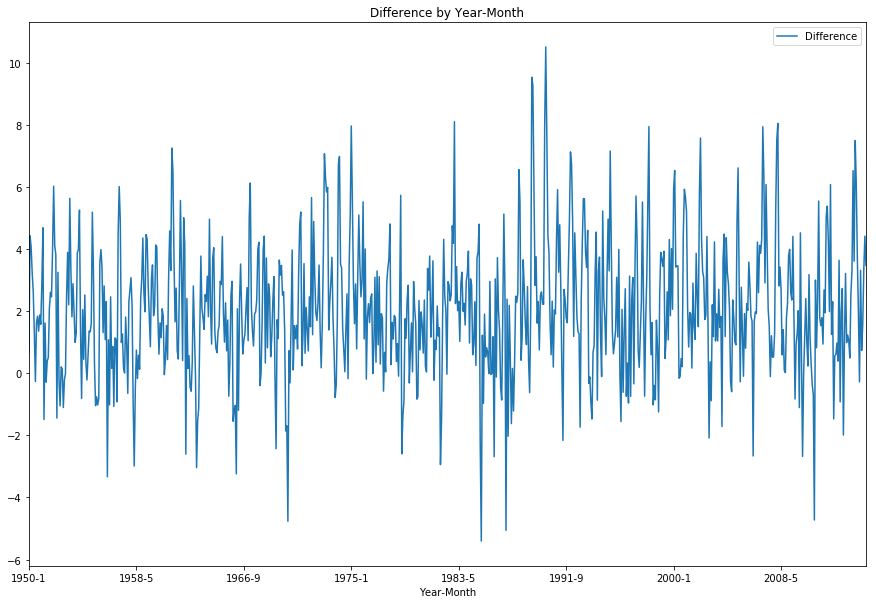

In [44]:
# Difference by Year-Month
df['Year-Month'] = df["Year"].map(str) + "-" + df["Month"].map(str)
df.plot.line(x = 'Year-Month', y = 'Difference', figsize=(15,10), title = "Difference by Year-Month");

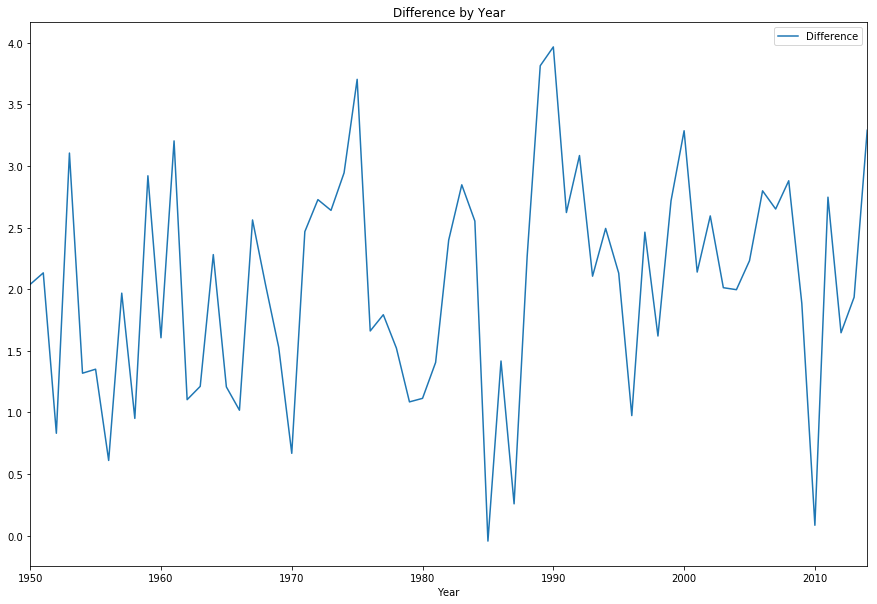

In [57]:
# Difference by Year
df2 = df.groupby(['Year'])['Difference'].mean().to_frame()
df2.reset_index(level=0, inplace=True)
df2.plot.line(x = 'Year', y = 'Difference', figsize=(15,10), title = "Difference by Year");

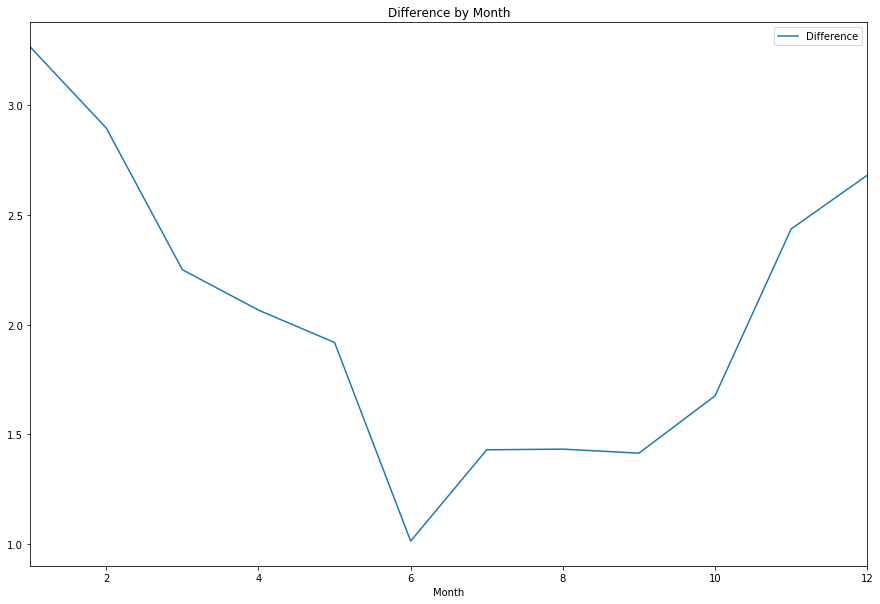

In [58]:
# Difference by Month
df3 = df.groupby(['Month'])['Difference'].mean().to_frame()
df3.reset_index(level=0, inplace=True)
df3.plot.line(x = 'Month', y = 'Difference', figsize=(15,10), title = "Difference by Month");